In [1]:
import matplotlib.pyplot as plt

from hdf5storage import loadmat, savemat 

import numpy as np


In [2]:
# load syn_pcorr
outdict=loadmat('pcorr_subj.mat')
pcorr_subj=outdict["pcorr"]
likelihood_subj=outdict["likelihood"]

In [3]:
# covert to bool
nonzerosmat=np.zeros(np.shape(pcorr_subj))
for subj in range(2):
    for ses in range(12):
        nonzerosmat[subj][ses]=pcorr_subj[subj][ses].astype(bool)

In [ ]:
# # a selected a freq to examine the distribution
# freq=25
# fig, ax = plt.subplots(1,1,figsize=(6, 6))
# plt.imshow(nonzerosmat[subj,ses,freq,:,:],vmin = 0,vmax = 1,cmap = 'Reds')
# plt.title('freq ( ' + str(freq) + ' Hz )')
# plt.colorbar()


In [4]:
# compute number of edges in subjects' model
numEdges_subj=np.zeros((2,12,30))
for subj in range(2):
    for ses in range(12):
        for freq in range(30):
            numEdges_subj[subj][ses][freq]=(np.sum(nonzerosmat[subj][ses][freq])-32)/2

In [5]:
# compare single model and subject model
# load pcorr from single model
outdict=loadmat('..\Pcorr_single_model\pcorr_single.mat')
pcorr_single=outdict["pcorr"]
likelihood_single=outdict["likelihood"]

# covert to bool
nonzerosmat_single=np.zeros(np.shape(pcorr_single))
for freq in range(30):
    nonzerosmat_single[freq]=pcorr_single[freq].astype(bool)

# compute number of edges in single model
numEdges_single=np.zeros((30))
for freq in range(30):
    numEdges_single[freq]=(np.sum(nonzerosmat_single[freq])-32)/2

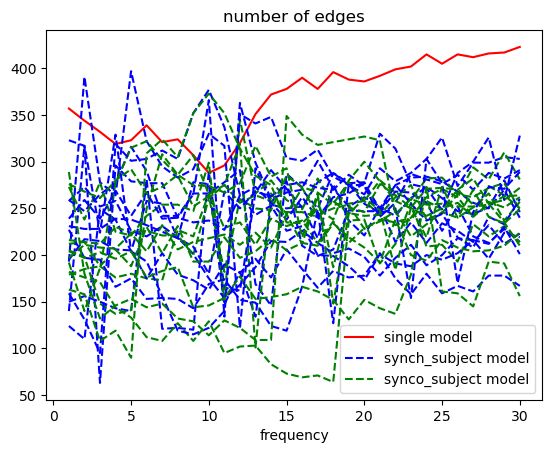

In [6]:
# plot to compare the number of edges (single vs subject model)

singleplt=plt.plot(np.arange(1,31),numEdges_single, 'r', label='single model')
plt.title('number of edges')

for subj in range(2):
    for ses in list(range(0,12,2)): # synch [0, 2, 4, 6, 8, 10]
        if subj==0 and ses==0:
            synchplt=plt.plot(np.arange(1,31),numEdges_subj[subj][ses], 'b--', label='synch_subject model')
        else:
            synchplt=plt.plot(np.arange(1,31),numEdges_subj[subj][ses], 'b--', label=str())
            
    for ses in list(range(1,12,2)): # [1, 3, 5, 7, 9, 11]
        if subj==0 and ses==1:
            syncoplt=plt.plot(np.arange(1,31),numEdges_subj[subj][ses], 'g--', label='synco_subject model')
        else:
            syncoplt=plt.plot(np.arange(1,31),numEdges_subj[subj][ses], 'g--', label=str())


plt.xlabel('frequency')

plt.legend()

plt.show()

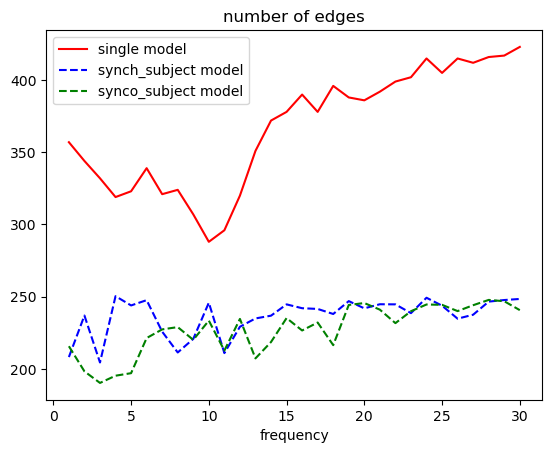

In [7]:
# plot to compare the average number of edges (single vs subj)

singleplt=plt.plot(np.arange(1,31),numEdges_single, 'r', label='single model')
plt.title('number of edges')

synchplt=plt.plot(np.arange(1,31),\
    np.mean(np.mean(numEdges_subj[:,list(range(0,12,2)),:],axis=1),axis=0), \
        'b--', label='synch_subject model')
        
syncoplt=plt.plot(np.arange(1,31),\
    np.mean(np.mean(numEdges_subj[:,list(range(1,12,2)),:],axis=1),axis=0), \
        'g--', label='synco_subject model')


plt.xlabel('frequency')

plt.legend()

plt.show()

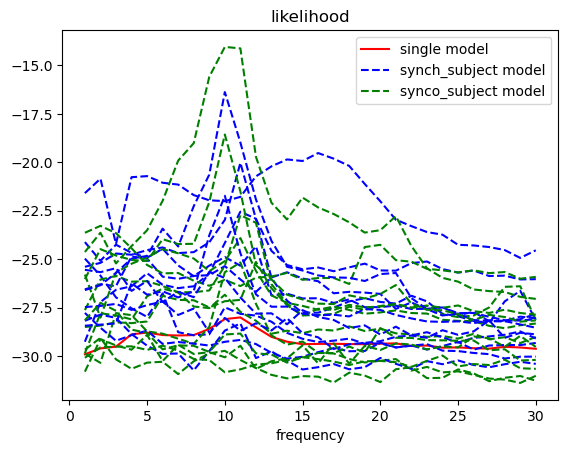

In [8]:
# plot to compare likelihood (single vs subject model)

singleplt=plt.plot(np.arange(1,31),likelihood_single, 'r', label='single model')

plt.title('likelihood')

for subj in range(2):
    for ses in list(range(0,12,2)): # synch [0, 2, 4, 6, 8, 10]
        if subj==0 and ses==0:
            synchplt=plt.plot(np.arange(1,31),likelihood_subj[subj][ses], 'b--', label='synch_subject model')
        else:
            synchplt=plt.plot(np.arange(1,31),likelihood_subj[subj][ses], 'b--', label=str())
            
    for ses in list(range(1,12,2)): # [1, 3, 5, 7, 9, 11]
        if subj==0 and ses==1:
            syncoplt=plt.plot(np.arange(1,31),likelihood_subj[subj][ses], 'g--', label='synco_subject model')
        else:
            syncoplt=plt.plot(np.arange(1,31),likelihood_subj[subj][ses], 'g--', label=str())


plt.xlabel('frequency')

plt.legend()

plt.show()